# Vizualisation dataset

In [3]:
import os
import glob
import random
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
# --- Configuration ---
# Chemin vers le répertoire contenant les dossiers des types de cellules
data_path = "/home/anthony-sauvage/repo/BloodCellClassification/app/data/raw/bloodcells_dataset"
images_to_show = 9 # Nombre d'images à afficher par type de cellule


In [55]:
import os
import json

def map_subdirs_to_files(dir_path):
    """
    Crée un dictionnaire qui mappe directement chaque nom de sous-répertoire
    à la liste de ses fichiers (images).

    Format de sortie :
    {
        "nom_sous_repertoire_1": ["img1.jpg", "img2.jpg"],
        "nom_sous_repertoire_2": ["imgA.jpg", "imgB.jpg"],
        ...
    }

    Args:
        dir_path (str): Le chemin vers le répertoire principal.

    Returns:
        dict: Un dictionnaire où les clés sont les noms des sous-répertoires
              et les valeurs sont les listes de noms de fichiers.
              Retourne un dictionnaire vide si le chemin n'est pas un répertoire valide ou est vide.
    """
    direct_mapping = {}
    if not os.path.isdir(dir_path):
        print(f"Le chemin '{dir_path}' n'est pas un répertoire valide.")
        return direct_mapping

    for item_name in os.listdir(dir_path):
        item_path = os.path.join(dir_path, item_name)
        
        # On s'assure que c'est bien un sous-répertoire
        if os.path.isdir(item_path):
            # Liste uniquement les fichiers dans chaque sous-répertoire
            files_in_subdir = [f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))]
            direct_mapping[item_name] = files_in_subdir # Le nom du sous-répertoire est la clé
            
    return direct_mapping

# --- Exemple d'utilisation ---
# Spécifiez le chemin vers votre dataset
data_path = '/home/anthony-sauvage/repo/BloodCellClassification/app/data/raw/bloodcells_dataset'

# Appelez la fonction pour créer le mapping direct
dataset_direct_map = map_subdirs_to_files(data_path)

# Affichez le mapping complet pour vérifier (optionnel)
if dataset_direct_map:
    print("--- Mapping direct complet ---")
    print(json.dumps(dataset_direct_map, indent=2)) # Affiche de manière lisible
    print("\\n")

    # --- Comment accéder directement aux listes d'images par nom de sous-répertoire ---
    print("--- Accès direct aux données ---")
    
    # Exemple: Accéder aux images du sous-répertoire 'EOSINOPHIL'
    # (Assurez-vous que ce sous-répertoire existe ou gérez l'erreur KeyError)
    cell_type_to_access = "ig" # Changez ceci par le nom du sous-répertoire souhaité
    
    if cell_type_to_access in dataset_direct_map:
        images_list = dataset_direct_map[cell_type_to_access]
        print(f"Images pour le type '{cell_type_to_access}' (les 5 premières):")
        print(images_list[:5])
    else:
        print(f"Le sous-répertoire '{cell_type_to_access}' n'a pas été trouvé dans le mapping.")

    # Pour lister tous les types de cellules (noms des sous-répertoires) disponibles :
    available_cell_types = list(dataset_direct_map.keys())
    print(f"\\nTypes de cellules disponibles (sous-répertoires) : {available_cell_types}")

else:
    print("Aucune donnée trouvée, le chemin n'est pas valide ou le répertoire est vide.")


--- Mapping direct complet ---
{
  "platelet": [
    "PLATELET_614174.jpg",
    "PLATELET_208869.jpg",
    "PLATELET_441264.jpg",
    "PLATELET_200759.jpg",
    "PLATELET_756667.jpg",
    "PLATELET_254469.jpg",
    "PLATELET_119734.jpg",
    "PLATELET_43964.jpg",
    "PLATELET_258058.jpg",
    "PLATELET_913537.jpg",
    "PLATELET_279225.jpg",
    "PLATELET_124214.jpg",
    "PLATELET_822250.jpg",
    "PLATELET_34131.jpg",
    "PLATELET_669221.jpg",
    "PLATELET_281882.jpg",
    "PLATELET_932799.jpg",
    "PLATELET_694130.jpg",
    "PLATELET_646119.jpg",
    "PLATELET_21766.jpg",
    "PLATELET_191840.jpg",
    "PLATELET_829851.jpg",
    "PLATELET_104489.jpg",
    "PLATELET_58512.jpg",
    "PLATELET_829954.jpg",
    "PLATELET_723180.jpg",
    "PLATELET_345087.jpg",
    "PLATELET_563857.jpg",
    "PLATELET_789722.jpg",
    "PLATELET_284535.jpg",
    "PLATELET_927482.jpg",
    "PLATELET_78013.jpg",
    "PLATELET_281120.jpg",
    "PLATELET_126743.jpg",
    "PLATELET_942537.jpg",
    "PLATEL

In [73]:
def get_image_path(dataset_map, subdir_name: str, index_img: int):
    list_img = dataset_map[subdir_name]
    img_path = os.path.join(data_path, f"{subdir_name}/{list_img[index_img]}")
    print(img_path)
    return img_path

img_path = get_image_path(dataset_map, "ig", 0)

/home/anthony-sauvage/repo/BloodCellClassification/app/data/raw/bloodcells_dataset/ig/MY_210359.jpg


In [76]:
import numpy as np
import cv2 #import OpenCV
import matplotlib.pyplot as plt

def show_image(dataset_map: dict, subdir_name: str, index_img: int, color: bool = False):
    """
    Affiche les images format jpg du dataset
    """
    img_path = get_image_path(dataset_map, subdir_name, index_img)
    plt.figure(figsize = (8,5))

    if color:
        img_color = cv2.imread(img_path, cv2.IMREAD_COLOR)
        plt.imshow(img_color)

    else:
        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_gray, cmap = "gray")
    plt.title("Source : " + os.path.basename(img_path) + "\n" + "Type : " + subdir_name)
    plt.xticks([])
    plt.yticks([])

    plt.show();


/home/anthony-sauvage/repo/BloodCellClassification/app/data/raw/bloodcells_dataset/basophil/BA_883452.jpg


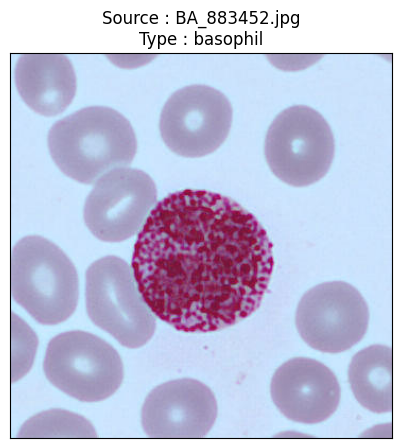

In [79]:
show_image(dataset_map, subdir_name="basophil", index_img=1, color=True)

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Assurez-vous que votre fonction de mapping et votre dictionnaire sont définis avant ce bloc
# Exemple :
# data_path = '/home/anthony-sauvage/repo/BloodCellClassification/app/data/raw/bloodcells_dataset'
# dataset_direct_map = map_subdirs_to_files_direct(data_path)

def get_image_path(dataset_map, base_path, subdir_name, index_img):
    """
    Construit le chemin complet et validé vers un fichier image.
    
    Args:
        dataset_map (dict): Le dictionnaire mappant les sous-répertoires aux listes d'images.
        base_path (str): Le chemin de base du dataset.
        subdir_name (str): Le nom du sous-répertoire (type de cellule).
        index_img (int): L'index de l'image dans la liste.
        
    Returns:
        str: Le chemin complet vers l'image, ou None si une erreur se produit.
    """
    # Vérifie si le sous-répertoire existe dans le mapping
    if subdir_name not in dataset_map:
        print(f"Erreur : Le sous-répertoire '{subdir_name}' n'existe pas. Sous-répertoires disponibles : {list(dataset_map.keys())}")
        return None
    
    images_list = dataset_map[subdir_name]
    
    # Vérifie si l'index est valide
    if not 0 <= index_img < len(images_list):
        print(f"Erreur : L'index {index_img} est hors limites pour le sous-répertoire '{subdir_name}' (contient {len(images_list)} images).")
        return None
        
    image_name = images_list[index_img]
    return os.path.join(base_path, subdir_name, image_name)

def show_image(dataset_map, base_path, subdir_name, index_img, color=False):
    """
    Affiche une image spécifique du dataset en utilisant le mapping direct.
    
    Args:
        dataset_map (dict): Le dictionnaire de mapping.
        base_path (str): Le chemin de base du dataset.
        subdir_name (str): Le nom du sous-répertoire.
        index_img (int): L'index de l'image à afficher.
        color (bool): Si True, affiche l'image en couleur. Sinon, en niveaux de gris.
    """
    # Obtenir le chemin de l'image en passant tous les arguments nécessaires
    img_path = get_image_path(dataset_map, base_path, subdir_name, index_img)
    
    if img_path and os.path.exists(img_path):
        plt.figure(figsize=(8, 5))
        
        if color:
            img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR) 
        else:
            img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_gray, cmap='gray')
            
        plt.title("Source : " + os.path.basename(img_path) + "\n" + "Type de cellule: " + subdir_name)
        plt.xticks([])
        plt.yticks([])
        plt.show()
    else:
        # Le message d'erreur est déjà affiché par get_image_path
        print("Affichage annulé.")

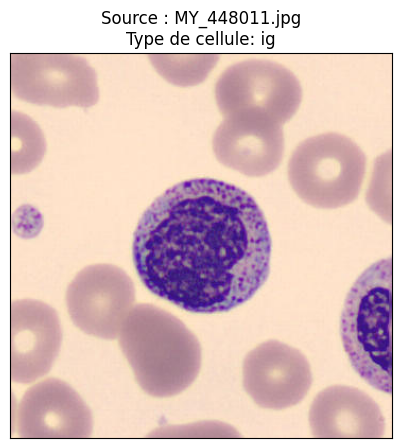

In [ ]:
show_image(dataset_map, data_path, "ig", 6, color=True)

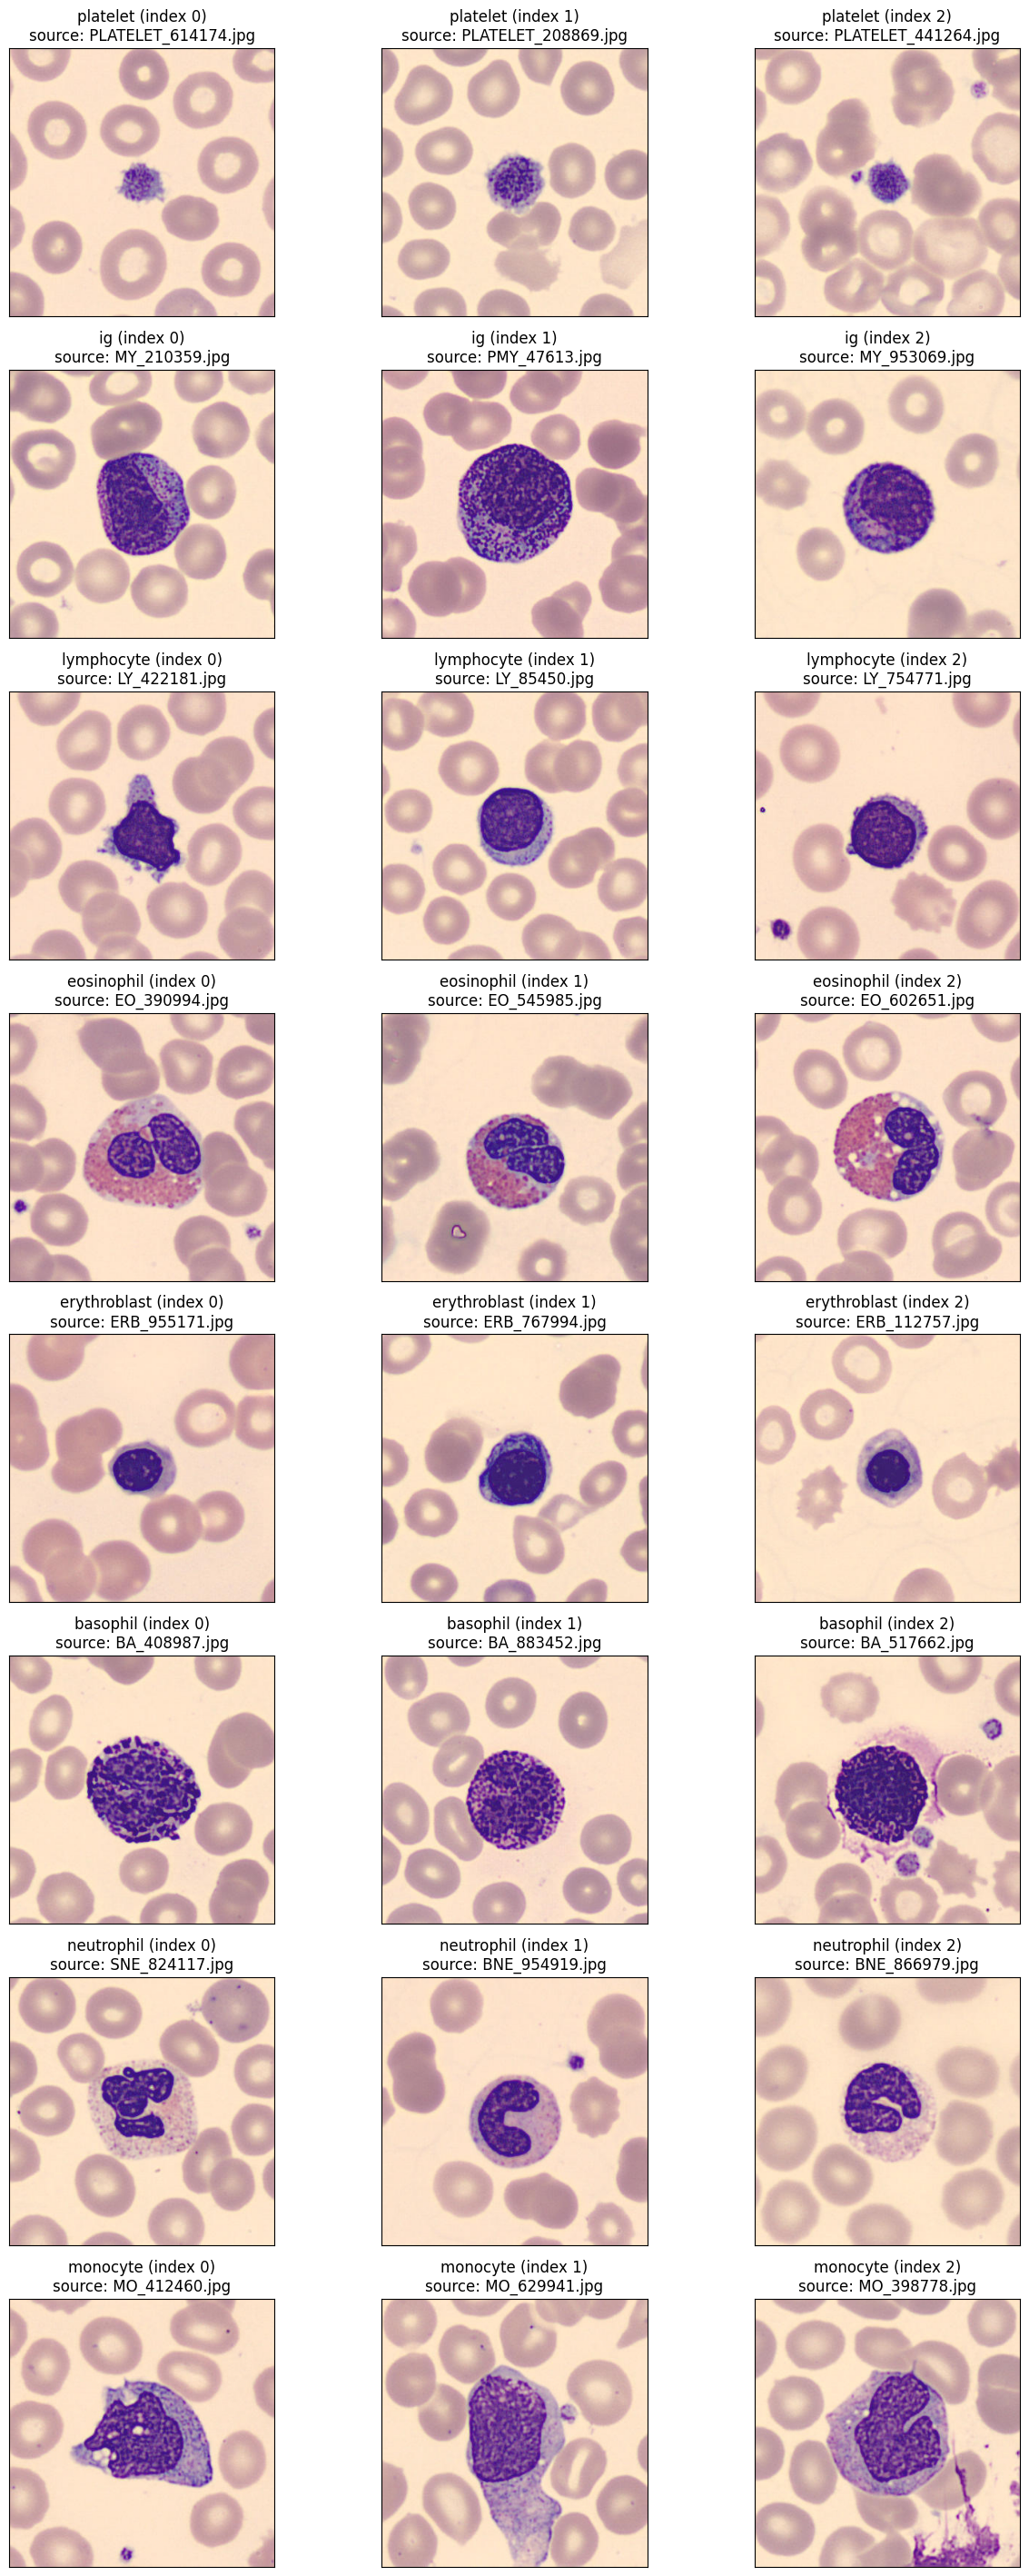

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_image(dataset_map, base_path, subdir_name, index_img, color=False, ax=None):
    """
    Affiche une image spécifique du dataset en utilisant le mapping direct.
    
    Args:
        dataset_map (dict): Le dictionnaire de mapping.
        base_path (str): Le chemin de base du dataset.
        subdir_name (str): Le nom du sous-répertoire.
        index_img (int): L'index de l'image à afficher.
        color (bool): Si True, affiche l'image en couleur. Sinon, en niveaux de gris.
        ax (matplotlib.axes.Axes, optional): L'axe sur lequel afficher l'image. 
                                           Si None, crée une nouvelle figure.
    
    Returns:
        bool: True si l'image a été affichée avec succès, False sinon.
    """
    # Vérifie si le sous-répertoire existe dans le mapping
    if subdir_name not in dataset_map:
        print(f"Erreur : Le sous-répertoire '{subdir_name}' n'existe pas. Sous-répertoires disponibles : {list(dataset_map.keys())}")
        return False
    
    images_list = dataset_map[subdir_name]
    
    # Vérifie si l'index est valide
    if not 0 <= index_img < len(images_list):
        print(f"Erreur : L'index {index_img} est hors limites pour le sous-répertoire '{subdir_name}' (contient {len(images_list)} images).")
        return False
        
    image_name = images_list[index_img]
    img_path = os.path.join(base_path, subdir_name, image_name)
    
    if not os.path.exists(img_path):
        print(f"Erreur : Le fichier '{img_path}' n'existe pas.")
        return False
    
    # Si ax est None, crée une nouvelle figure (comportement original)
    if ax is None:
        plt.figure(figsize=(8, 5))
        ax = plt.gca()  # Get Current Axis
    
    # Charge et affiche l'image
    if color:
        img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img_bgr is None:
            print(f"Erreur : Impossible de charger l'image '{img_path}'.")
            return False
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.set_title(f"{subdir_name} (index {index_img})" + "\n" + f"source: {image_name}")
    else:
        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img_gray is None:
            print(f"Erreur : Impossible de charger l'image '{img_path}'.")
            return False
        ax.imshow(img_gray, cmap='gray')
        ax.set_title(f"{subdir_name} (index {index_img})" + "\n" + f"source: {image_name}")
        
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Si ax était None (nouvelle figure), affiche la figure
    if ax == plt.gca():
        plt.show()
    
    return True

# Maintenant, créons display_sample_images_per_subdir en utilisant show_image
def display_sample_images_per_subdir(dataset_map, base_path, num_samples_per_subdir=3, display_color=True):
    """
    Affiche un certain nombre d'images échantillons pour chaque sous-répertoire (type de cellule)
    en utilisant des subplots et la fonction show_image.

    Args:
        dataset_map (dict): Le dictionnaire mappant les sous-répertoires aux listes d'images.
        base_path (str): Le chemin de base du dataset.
        num_samples_per_subdir (int): Le nombre d'images à afficher pour chaque sous-répertoire.
        display_color (bool): Si True, affiche les images en couleur. Sinon, en niveaux de gris.
    """
    subdirs = list(dataset_map.keys())
    num_subdirs = len(subdirs)

    if num_subdirs == 0:
        print("Le dictionnaire dataset_map est vide. Aucune image à afficher.")
        return

    # Crée une figure avec des subplots
    fig, axes = plt.subplots(
        nrows=num_subdirs, 
        ncols=num_samples_per_subdir, 
        figsize=(5 * num_samples_per_subdir, 4.5 * num_subdirs),
        squeeze=False
    )

    for i, subdir_name in enumerate(subdirs):
        for j in range(num_samples_per_subdir):
            # Utilise show_image pour afficher l'image sur le subplot courant
            success = show_image(
                dataset_map=dataset_map,
                base_path=base_path,
                subdir_name=subdir_name,
                index_img=j,  # Utilise les j premières images
                color=display_color,
                ax=axes[i, j]  # Passe l'axe du subplot courant
            )
            
            # Si show_image échoue, désactive l'axe
            if not success:
                axes[i, j].set_title(f"{subdir_name}\nNon disponible")
                axes[i, j].axis('off')

    fig.suptitle("Échantillons d'images par type de cellule", fontsize=16, y=1.01)
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.show()

# --- COMMENT UTILISER LA NOUVELLE FONCTION ---
# Assurez-vous que ces variables sont définies et contiennent les bonnes valeurs
# data_path = '/home/anthony-sauvage/repo/BloodCellClassification/app/data/raw/bloodcells_dataset'
# dataset_direct_map = map_subdirs_to_files_direct(data_path)

if dataset_map:
    # Afficher 3 échantillons en couleur pour chaque type de cellule
    display_sample_images_per_subdir(dataset_map, data_path, num_samples_per_subdir=3, display_color=True)

# Remarques
On remarque que les images sont centrées sur la cellule sanguine. 
Les cellules en arrière plan ont une couleur moins apparente que la cellule cible.